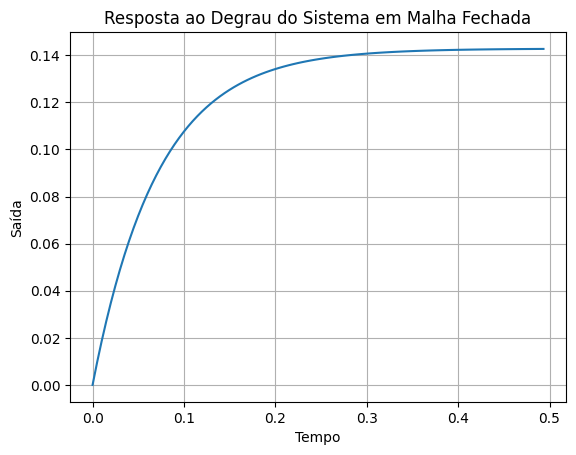

In [7]:
#######################################
#CONTROLADOR PROPORCIONAL (P)
#######################################
!pip install control
import control as ctl
import matplotlib.pyplot as plt
import numpy as np

# Definindo o sistema (exemplo: um sistema de primeira ordem)
num = [1]
den = [1, 12]
sys = ctl.tf(num, den)

# Definindo o controlador proporcional
Kp = 2  # Ajuste o ganho proporcional conforme necessário
C = ctl.tf([Kp], [1])

# Sistema em malha fechada
sys_cl = ctl.feedback(sys*C, 1)

# Simulação
t, y = ctl.step_response(sys_cl)

# Plotando a resposta ao degrau
plt.plot(t, y)
plt.xlabel('Tempo')
plt.ylabel('Saída')
plt.title('Resposta ao Degrau do Sistema em Malha Fechada')
plt.grid(True)
plt.show()

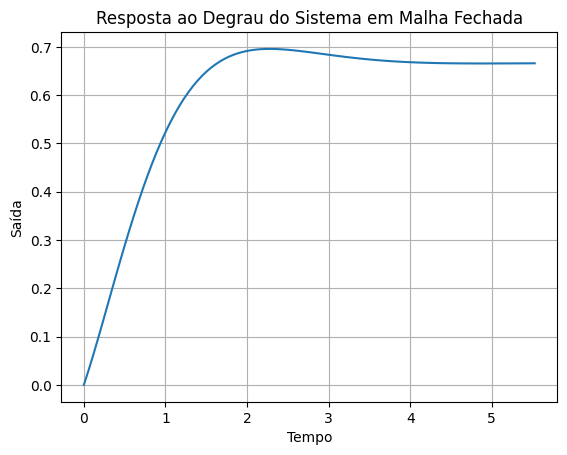

In [1]:
#######################################
#CONTROLADOR PROPORCIONAL DERIVATIVO (PD)
#######################################
!pip install control
import control as ctl
import matplotlib.pyplot as plt
import numpy as np

# Definindo o sistema (exemplo: um sistema de segunda ordem)
num = [1]
den = [1, 2, 1]
sys = ctl.tf(num, den)

# Definindo o controlador PD
Kp = 2  # Ajuste o ganho proporcional
Kd = 0.5  # Ajuste o ganho derivativo
C = ctl.tf([Kd, Kp], [1])

# Sistema em malha fechada
sys_cl = ctl.feedback(sys*C, 1)

# Simulação
t, y = ctl.step_response(sys_cl)

# Plotando a resposta ao degrau
plt.plot(t, y)
plt.xlabel('Tempo')
plt.ylabel('Saída')
plt.title('Resposta ao Degrau do Sistema em Malha Fechada')
plt.grid(True)
plt.show()

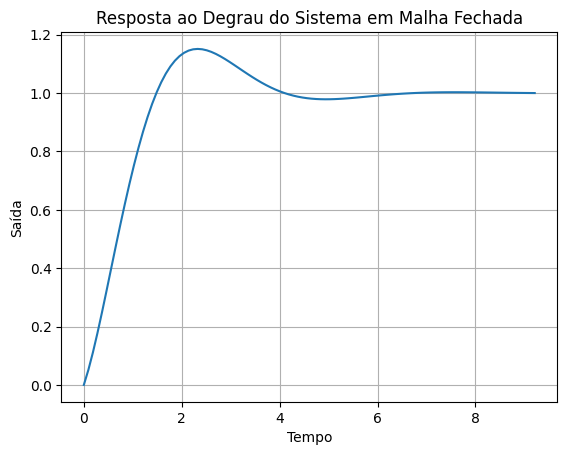

In [8]:
#######################################
#CONTROLADOR PROPORCIONAL INTEGRADOR (PI)
#######################################
!pip install control
import control as ctl
import matplotlib.pyplot as plt
import numpy as np

# Definindo o sistema (exemplo: um sistema de primeira ordem)
num = [1]
den = [1, 1]
sys = ctl.tf(num, den)

# Definindo o controlador PI
Kp = 2  # Ajuste o ganho proporcional
Ki = 0.5  # Ajuste o ganho integral
C = ctl.tf([Ki, Kp], [1, 0])  # Note o polo em zero para o termo integral

# Sistema em malha fechada
sys_cl = ctl.feedback(sys*C, 1)

# Simulação
t, y = ctl.step_response(sys_cl)

# Plotando a resposta ao degrau
plt.plot(t, y)
plt.xlabel('Tempo')
plt.ylabel('Saída')
plt.title('Resposta ao Degrau do Sistema em Malha Fechada')
plt.grid(True)
plt.show()

In [4]:
#######################################
#CONTROLADOR PROPORCIONAL INTEGRADOR DERIVATIVO (PID)
#######################################
!pip install control
import control as ctl
from scipy.signal import find_peaks
import matplotlib.pyplot as plt
import numpy as np

# Definindo o sistema (exemplo: um sistema de segunda ordem)
num = [1]
den = [1, 2, 1]
sys = ctl.tf(num, den)

# Função para determinar o ganho crítico e o período crítico usando o método de Ziegler-Nichols
def ziegler_nichols(sys):
    # Inicialize o controlador P com um ganho baixo
    Kp = 0.1
    C = ctl.tf([Kp], [1])

    # Aumente o ganho Kp até o sistema oscilar
    while True:
        max_iter = 100
        for i in range(max_iter):
          if i == max_iter - 1:
            print("Máximo de iterações atingido. O sistema pode ser muito estável.")
            return None, None
        sys_cl = ctl.feedback(sys*C, 1)
        t, y = ctl.step_response(sys_cl)
        if any(np.diff(np.sign(y - 1)) != 0):  # Verifica se há oscilação
            break
        Kp *= 1.1  # Aumenta o ganho em 10%

    # Determine o período crítico (tempo entre dois picos consecutivos)
    peaks, _ = find_peaks(y)
    P_u = 2 * (t[peaks[-1]] - t[peaks[-2]])

    return Kp, P_u


# Determinando o ganho crítico e o período crítico
Kp_crit, P_u = ziegler_nichols(sys)

# Calculando os ganhos PID usando as regras de Ziegler-Nichols
Kp = 0.6 * Kp_crit
Ki = 1.2 * Kp_crit / P_u
Kd = 0.075 * Kp_crit * P_u

# Definindo o controlador PID
C = ctl.tf([Kd, Kp, Ki], [1, 0])

# Sistema em malha fechada
sys_cl = ctl.feedback(sys*C, 1)

# Simulação
t, y = ctl.step_response(sys_cl)

# Plotando a resposta ao degrau
plt.plot(t, y)
plt.xlabel('Tempo')
plt.ylabel('Saída')
plt.title('Resposta ao Degrau do Sistema em Malha Fechada')
plt.grid(True)
plt.show()

Máximo de iterações atingido. O sistema pode ser muito estável.


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'